In [24]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [25]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime as dt,timedelta

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [27]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
inspector = inspect(engine)

In [28]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [29]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [30]:
# Save references to each table
measurements = Base.classes.measurement
station = Base.classes.station

In [31]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [32]:
# Find the most recent date in the data set.
Recent_date = session.query(measurements.date).order_by(measurements.date.desc()).first()
Recent_date [0]

'2017-08-23'

<AxesSubplot:xlabel='date'>

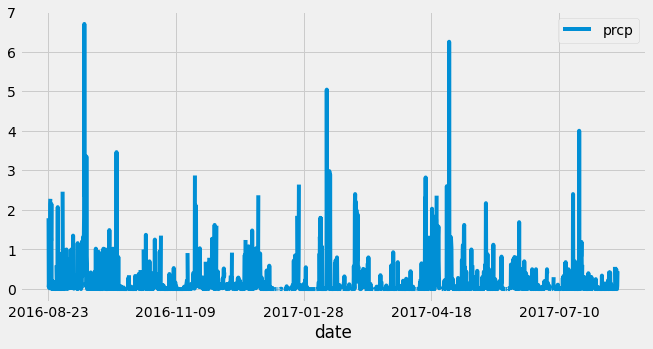

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
#Previous_date = dt.date(2017,8,23) - dt.timedelta(days=365)
Previous_date = dt.strptime(Recent_date[0], "%Y-%m-%d")
Previous_date = Previous_date-timedelta(days=365)
Lastyr_date = Previous_date.strftime("%Y-%m-%d")
Lastyr_date

# Perform a query to retrieve the date and precipitation scores
Prec_date = session.query (measurements.date, measurements.prcp).filter(measurements.date >=Lastyr_date).all()
Prec_date

# Save the query results as a Pandas DataFrame and set the index to the date column
Prec_df = pd.DataFrame (Prec_date)
Prec_df.set_index ("date",inplace=True)
Prec_df
# Sort the dataframe by date
Prec_df.sort_index (inplace=True)
Prec_df

# Use Pandas Plotting with Matplotlib to plot the data
Prec_df.plot(figsize=(10,5))


In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Prec_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [35]:
# Design a query to calculate the total number stations in the dataset
Calculate_count=session.query(station.station).count()
Calculate_count

9

In [36]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
Meas_state=session.query(measurements.station,func.count(measurements.station)).group_by(measurements.station).order_by(func.count(measurements.station).desc())
Meas_state
for station in Meas_state:
    print (station)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [37]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
Activate_state = session.query (func.min(measurements.tobs),func.max(measurements.tobs),func.avg(measurements.tobs)).filter(measurements.station==Meas_state[0][0])
Activate_state
for station in Activate_state:
    print (station)

(54.0, 85.0, 71.66378066378067)


In [38]:
# Using the most active station id
Active_state = Meas_state[0][0]
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Last_12 = session.query(measurements.tobs).filter(measurements.date > Lastyr_date).filter(measurements.station==Active_state).all()
Last_12

[(77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 

# Close session

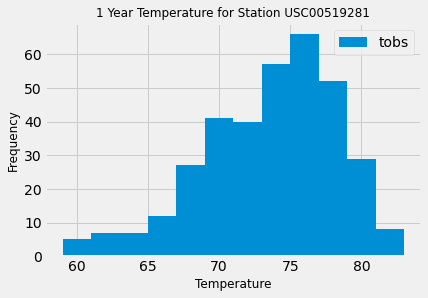

In [39]:
#histogram
temp_df=pd.DataFrame(Last_12)
plt.hist(temp_df['tobs'],12)
plt.xlabel("Temperature",fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("1 Year Temperature for Station USC00519281",fontsize=12)
labels=["tobs"]
plt.legend(labels)
plt.show()


In [40]:
# Close Session
session.close()